In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


Goal is to predict the age of the Abalone ...

In [2]:
from numpy import mean, std
from sklearn.metrics import mean_squared_log_error
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import optuna

In [3]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e4/train.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the examples
test_df = pd.read_csv("/kaggle/input/playground-series-s4e4/test.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 39476 to 87486
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 7.6+ MB


In [5]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
39476,39476,F,0.400,0.315,0.105,0.2535,0.0960,0.0675,0.1135,6
45426,45426,F,0.560,0.445,0.155,0.8370,0.3845,0.1940,0.2360,9
65969,65969,F,0.520,0.400,0.125,0.5755,0.2395,0.1460,0.1900,9
18789,18789,I,0.390,0.285,0.100,0.2810,0.1255,0.0620,0.0800,8
22930,22930,I,0.465,0.360,0.115,0.4335,0.1775,0.0920,0.1465,8


In [6]:
# #drop column id ...
# train_df.drop('id',axis=1,inplace=True)
# #And we won't be needing the sex column ...
# train_df.drop('Sex',axix=1,inplace=True)
train_df.drop(['id','Sex'],axis=1,inplace=True)

In [7]:
train_df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


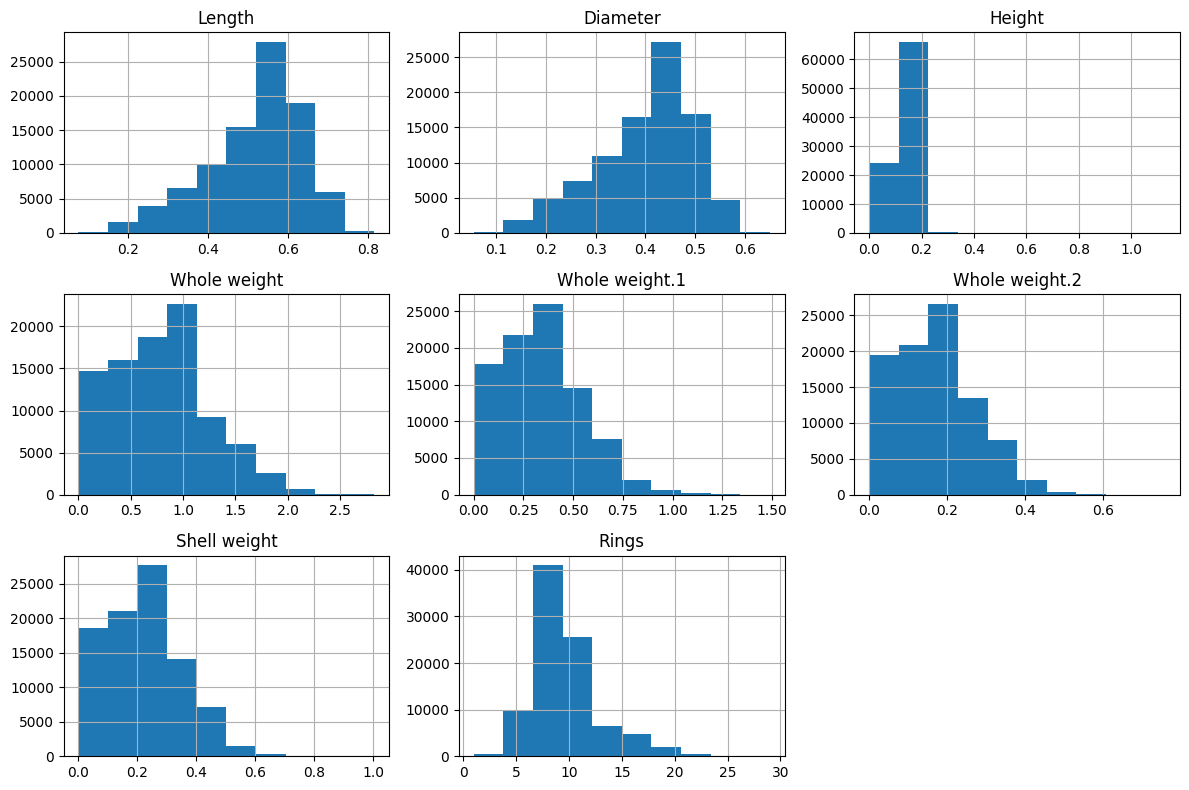

In [8]:
train_df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

In [9]:
#pie chart between Sex and age...

In [10]:
test_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [11]:
features=['Length','Diameter','Height','Whole weight','Whole weight.1','Whole weight.2','Shell weight','Rings']

In [12]:
len(train_df)

90615

In [13]:
X = train_df[features].drop(columns='Rings')
Y = train_df.Rings

In [14]:
#training, validation  data...
X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size=0.3,random_state=42)
print(len(X_train),len(X_val))

63430 27185


In [15]:
#as a practice...
#standardization of data...
scaler = StandardScaler()
scaler.fit(X_train)

X_train_Scaled = scaler.transform(X_train)
X_val_Scaled = scaler.transform(X_val)


In [16]:
#model training...
model = linear_model.GammaRegressor()
model.fit(X_train_Scaled,y_train)

GammaRegressor()

In [17]:
#make prediction...
model_prediction = model.predict(X_val_Scaled)

In [18]:
print("Negative values in y_val:", (y_val < 0).any())
print("Negative values in model_prediction:", (model_prediction < 0).sum())

Negative values in y_val: False
Negative values in model_prediction: 0


In [19]:
print(len(X_val_Scaled))
print(len(y_val))
print(len(model_prediction))

27185
27185
27185


In [20]:
# # Plot actual vs predicted values
# plt.scatter(X_val_Scaled, y_val, color='black', label='Actual')
# plt.scatter(X_val_Scaled, model_prediction, color='blue', label='Predicted')

# plt.xlabel('Scaled Features')
# plt.ylabel('Target')
# plt.title('Actual vs Predicted Values')
# plt.legend()

# plt.show()

In [21]:
#model evaluation - the metric for this competition is RMS log Error...
mean_sq_log_error = mean_squared_log_error(y_val,model_prediction)

print(f' Root Mean Squared Logarithmic Error: {mean_sq_log_error}')

 Root Mean Squared Logarithmic Error: 0.038240531811143647


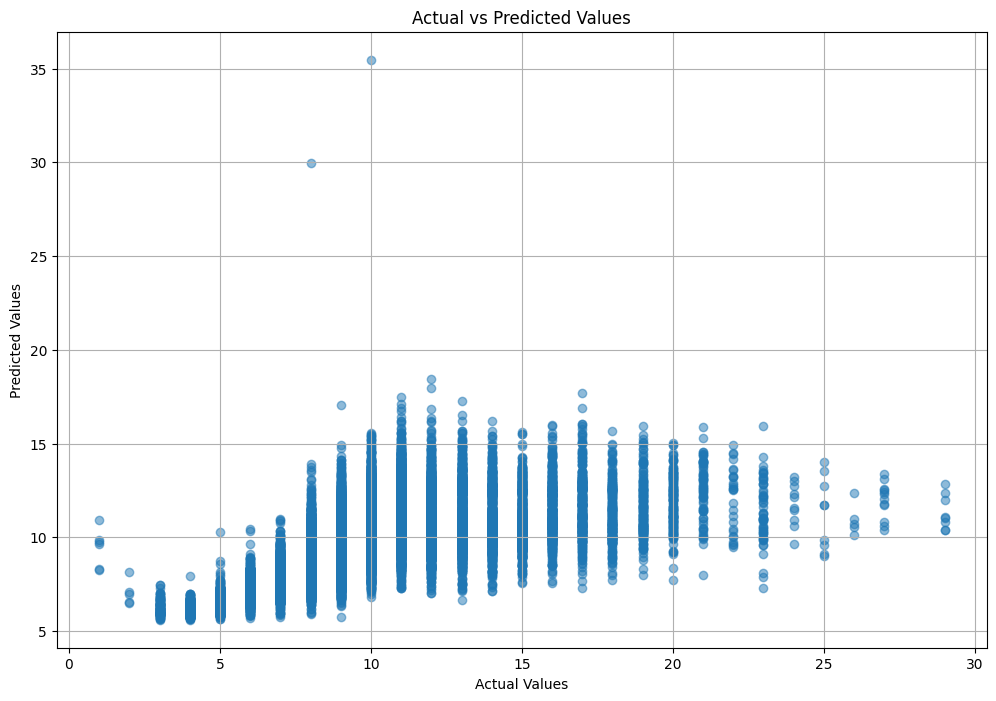

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(y_val,model_prediction,alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [23]:
# plt.figure(figsize=(12,8))
# plt.scatter(y_val, model_prediction, alpha=0.5)

# # Line of perfect fit
# min_val = min(min(y_val), min(model_prediction))  # find overall minimum
# max_val = max(max(y_val), max(model_prediction))  # find overall maximum
# plt.plot([min_val, max_val], [min_val, max_val], 'k-', color = 'r')

# plt.title('Actual vs Predicted Values')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.grid(True)
# plt.show()

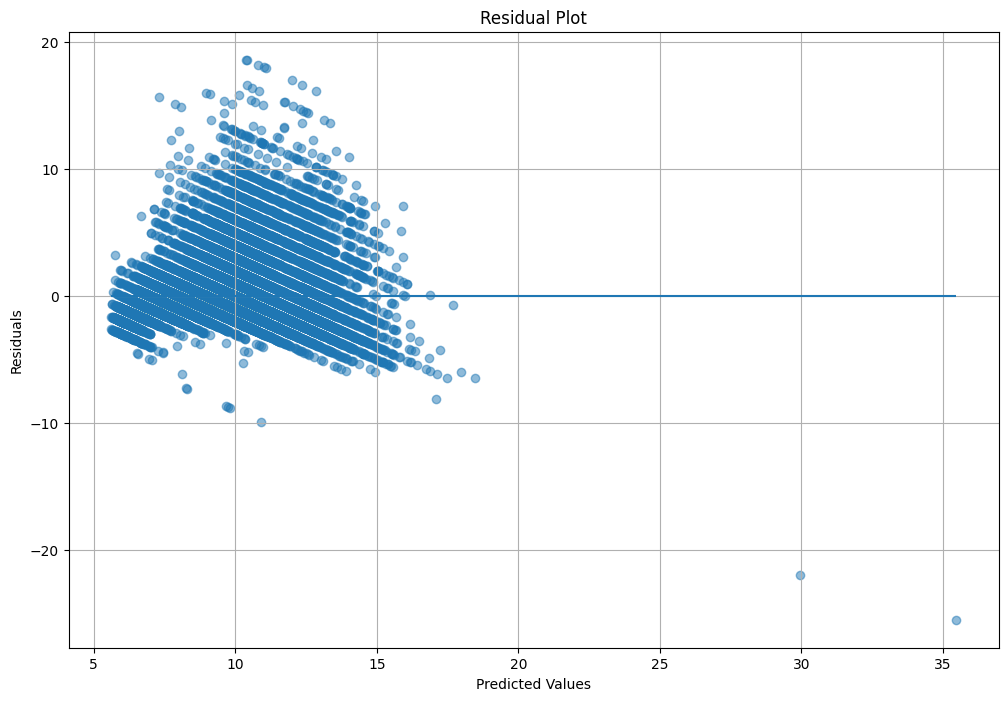

In [24]:
# Calculate the residuals
residuals = y_val - model_prediction

# Create the residual plot
plt.figure(figsize=(12,8))
plt.scatter(model_prediction, residuals, alpha=0.5)
plt.hlines(y=0, xmin=model_prediction.min(), xmax=model_prediction.max())
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

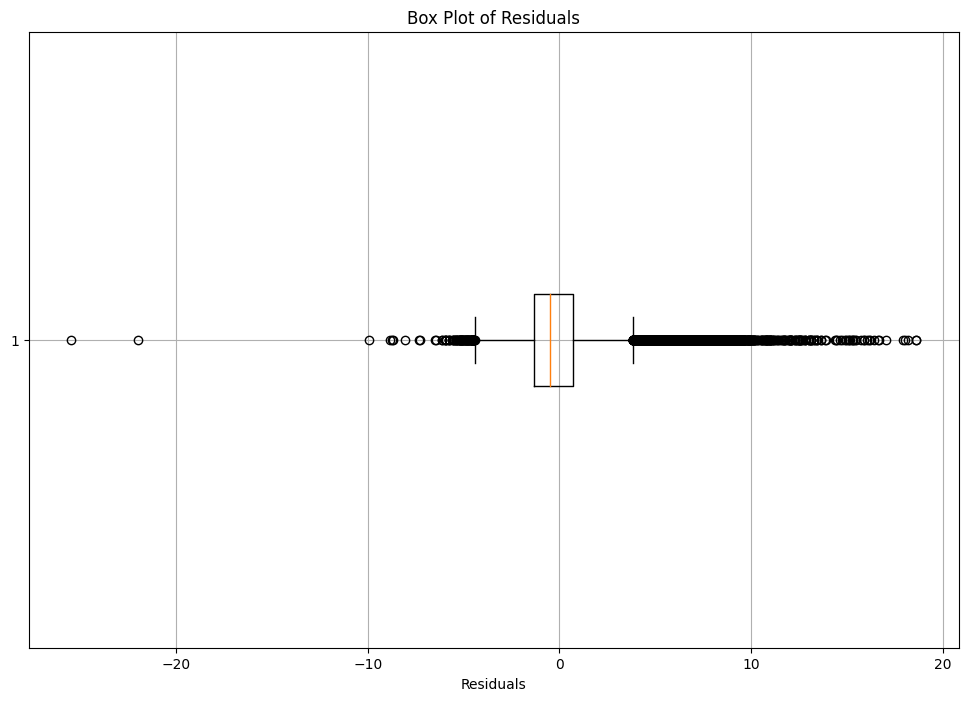

In [25]:
# Create the box plot
plt.figure(figsize=(12,8))
plt.boxplot(residuals, vert=False)
plt.title('Box Plot of Residuals')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()

In [26]:
test_df_Scaled = scaler.transform(test_df.drop(columns=['id','Sex'],inplace=False))
test_predictions = model.predict(test_df_Scaled)

In [27]:
#submission...
submission = pd.DataFrame({'id': test_df['id'], 'Rings': test_predictions})
submission.to_csv('s.csv', index=False)

In [28]:
# submission.head()